# Demo 06 - Transforming and Comparing Data

In this notebook we do a few things with the [NBA Salary Dataset](https://github.com/joshrosson/NBASalaryPredictions) to illustrate working on relationships between variables as well as transforming a few of those variables using the standard methods in Pandas.


In [ ]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
# Startup Magic to: (1) Mount Google Drive
# (2) Change to Course Folder
# (3) Pull latest Changes
# (4) Move to the Demo Directory so that the data files are available

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
!git pull
%cd _demos

In [1]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import seaborn as sns

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

First up we need to open up this data and get it loaded. You'll see there are lots of different stats in different columns.

In [11]:
# Load the data
# Data from here: https://github.com/joshrosson/NBASalaryPredictions
df_nba = pd.read_csv("./data/nba_stats.csv")
display(df_nba.head(10))

# Always double check your Dtypes
df_nba.dtypes

,Season,Name,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1995,A.C. Green,6473000.00,SF,31,PHO,82,52,2687,311,617,0.50,43,127,0.34,268,490,0.55,251,343,0.73,194,475,669,127,55,31,114,146,916
1,1995,Aaron McKie,845000.00,SG,22,POR,45,20,827,116,261,0.44,11,28,0.39,105,233,0.45,50,73,0.69,35,94,129,89,36,16,39,97,293
2,1995,Aaron Swinson,nan,SF,24,PHO,9,0,51,10,18,0.56,0,0,nan,10,18,0.56,4,5,0.80,3,5,8,3,1,0,5,8,24
3,1995,Aaron Williams,nan,PF,23,MIL,15,0,72,8,24,0.33,0,1,0.00,8,23,0.35,8,12,0.67,5,14,19,0,2,6,7,14,24
4,1995,Acie Earl,1040000.00,C,24,BOS,30,3,208,26,68,0.38,0,0,nan,26,68,0.38,14,29,0.48,19,26,45,2,6,8,14,39,66
5,1995,Adam Keefe,1650000.00,SF,24,UTA,75,0,1270,172,298,0.58,0,0,nan,172,298,0.58,117,173,0.68,135,192,327,30,36,25,62,141,461
6,1995,Adrian Caldwell,225000.00,PF,28,HOU,7,0,30,1,4,0.25,0,0,nan,1,4,0.25,3,6,0.50,1,9,10,0,1,0,1,6,5
7,1995,Alaa Abdelnaby,nan,PF,26,TOT,54,0,506,118,231,0.51,0,2,0.00,118,229,0.52,20,35,0.57,37,77,114,13,15,12,45,104,256
8,1995,Alaa Abdelnaby,nan,PF,26,SAC,51,0,476,117,220,0.53,0,2,0.00,117,218,0.54,20,35,0.57,34,72,106,13,15,12,40,102,254
9,1995,Alaa Abdelnaby,nan,PF,26,PHI,3,0,30,1,11,0.09,0,0,nan,1,11,0.09,0,0,nan,3,5,8,0,0,0,5,2,2


Season      int64
Name       object
Salary    float64
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [12]:
# For now, let's work only with the 2017 data since that is the most recent
df_2017nba = df_nba[(df_nba["Season"] == 2017)]
df_2017nba.head(10)

,Season,Name,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12234,2017,A.J. Hammons,1312611.00,C,24,DAL,22,0,163,17,42,0.41,5,10,0.50,12,32,0.38,9,20,0.45,8,28,36,4,1,13,10,21,48
12235,2017,Aaron Brooks,2116955.00,PG,32,IND,65,0,894,121,300,0.40,48,128,0.38,73,172,0.42,32,40,0.80,18,51,69,125,25,9,66,93,322
12236,2017,Aaron Gordon,5504420.00,SF,21,ORL,80,72,2298,393,865,0.45,77,267,0.29,316,598,0.53,156,217,0.72,116,289,405,150,64,40,89,172,1019
12237,2017,Aaron Harrison,nan,SG,22,CHO,5,0,17,0,4,0.00,0,2,0.00,0,2,0.00,1,2,0.50,0,3,3,3,0,0,0,2,1
12238,2017,Adreian Payne,nan,PF,25,MIN,18,0,135,23,54,0.43,3,15,0.20,20,39,0.51,14,19,0.74,9,24,33,7,8,7,8,32,63
12239,2017,Al Horford,27734405.00,C,30,BOS,68,68,2193,379,801,0.47,86,242,0.35,293,559,0.52,108,135,0.80,95,369,464,337,52,87,116,138,952
12240,2017,Al Jefferson,9769821.00,C,32,IND,66,1,931,235,471,0.50,0,1,0.00,235,470,0.50,65,85,0.77,75,203,278,57,19,16,33,125,535
12241,2017,Al-Farouq Aminu,7319035.00,SF,26,POR,61,25,1773,183,466,0.39,70,212,0.33,113,254,0.45,96,136,0.71,77,374,451,99,60,44,94,102,532
12242,2017,Alan Anderson,nan,SF,34,LAC,30,0,308,30,80,0.38,14,44,0.32,16,36,0.44,12,16,0.75,3,21,24,11,3,0,7,35,86
12243,2017,Alan Williams,6000000.00,C,24,PHO,47,0,708,138,267,0.52,0,1,0.00,138,266,0.52,70,112,0.62,94,198,292,23,27,32,37,125,346


I'm going to use Seaborn functions, just for fun. First up is the [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

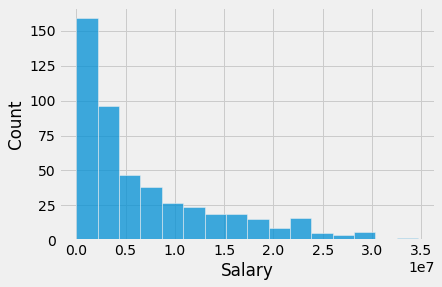

In [15]:
# First, let's visualize the salary data.
sns.histplot(df_2017nba["Salary"])

Is this data skewed? If so, which direction is it skewed? What does this tell us about the Mean and the Median?

In [16]:
df_2017nba["Salary"].describe()

count        487.00
mean     7220412.99
std      7331405.75
min        17224.00
25%      1638840.00
50%      4078320.00
75%     10660727.50
max     34682550.00
Name: Salary, dtype: float64

In [ ]:
# Transformation functions..
x = np.linspace(0.0001, 200, 500)
plt.plot(x**1.5, label="$x^{1.5}$")
plt.plot(x**1, label="f(x)")
plt.plot(x**0.2, label="$x^{0.2}$")
#plt.plot(np.log(x), label="log(x)")
plt.legend(loc='best')

In [ ]:
# Apply a few functions...
(df_nba['Salary']**2).plot.hist()
plt.show()
(df_nba['Salary']**0.2).plot.hist()
plt.show()
(np.log(df_nba['Salary'])).plot.hist()
plt.show()

## So what's going on?

Having very skewed data can make it hard to see what relationships may exist in our data. We'll see this a lot in Project 2. But for now let's investigage the relationship between Salary and how many points players score.


In [ ]:
# Uskewing the data can help us to see relationships.
# Try 2, 1, 0.2

# We'll use subplots to make this easier just for fun...
fig, ax = plt.subplots(1, 4, figsize=(15,5))

#df_nba.plot.scatter(x=(df_nba['Salary']**2.0), y=df_nba['PTS'], ax=ax[0])

ax[0].scatter((df_nba['Salary']**2.0), df_nba['PTS'])
ax[0].title.set_text("Squared Salary")
ax[1].scatter((df_nba['Salary']**1.0), df_nba['PTS'])
ax[1].title.set_text("No Transform")
ax[2].scatter((np.log(df_nba['Salary'])), df_nba['PTS'])
ax[2].title.set_text("Log Transform")
ax[3].scatter((df_nba['Salary']**0.2), df_nba['PTS'])
ax[3].title.set_text("x^0.2 Salary")

In [ ]:
# Z-standardize and replot.
df_nba['std_salary'] = (df_nba['Salary'] - df_nba['Salary'].mean()) / df_nba['Salary'].std()
df_nba['std_pts'] = (df_nba['PTS'] - df_nba['PTS'].mean()) / df_nba['PTS'].std()


In [ ]:
# Plot Salary v. Assists..
# Can see a bit more distribution and units are interpretable!
df_nba.plot.scatter(x='std_salary', y='std_pts')

In [ ]:
# Compute the whole matrix..
df_nba.corr()

In [ ]:
# Compute Some Cross Correlations...
plt.figure(figsize = (16,5))
sns.heatmap(df_nba.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [ ]:
sns.pairplot(df_nba)

# Find the closest players!


In [ ]:
# Get a smaller set, drop NA's and get dummies...
df_comp = df_nba[['Name', 'Pos', 'Salary', 'PTS', 'TRB']].copy()
df_comp.dropna(inplace=True)
df_comp.reset_index(drop=True, inplace=True)
df_comp

In [ ]:
sns.pairplot(df_comp)

In [ ]:
# get dummies
df_ml = pd.get_dummies(df_comp[['Pos', 'Salary', 'PTS', 'TRB']])
df_ml

We're going to start using [SKLearn](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) we'll get more into it as we go!

In [ ]:
# Use SKLEARN to do soe distances.
from sklearn.metrics import pairwise_distances
D = pairwise_distances(df_ml, metric="cosine")
D.shape

In [ ]:
# Find someone intersting...
df_comp[(df_comp['Name'] == 'Anthony Davis')]

In [ ]:
D

In [ ]:
# Whose the closest
D[8416, :].argmin()

In [ ]:
# Wait... that's me...
np.fill_diagonal(D, np.inf)

In [ ]:
D[8416, :].argmin()

In [ ]:
df_comp.loc[5561]